# Initialize

In [1]:
import pandas as pd
import numpy as np
import zipfile as zpf
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean, mahalanobis
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import empirical_covariance
from sklearn import metrics
import seaborn as sn
from joblib import Parallel, delayed


In [2]:
!gdown 1-GFtU-DPbWDsAJ-hckTe0dA2KikfwubJ

Downloading...
From: https://drive.google.com/uc?id=1-GFtU-DPbWDsAJ-hckTe0dA2KikfwubJ
To: /content/17112001.csv
100% 15.5M/15.5M [00:00<00:00, 141MB/s]


In [3]:
damadic = pd.read_csv('/content/17112001.csv')
class1f16_idx = np.concatenate([np.arange(56670,56770), np.arange(57475,57530), np.arange(57675,57800)])
class2f17_idx = np.concatenate([np.arange(53780,53794), np.arange(54193,54315)])
class3f18_idx = np.arange(54600,54700)
class4f19_idx = np.concatenate([np.arange(55482,55517), np.arange(55977,56015), np.arange(57030,57072), np.arange(58150,58325)])
class5n_idx = np.setdiff1d(np.arange(damadic.shape[0]), np.concatenate([class1f16_idx, class2f17_idx, class3f18_idx, class4f19_idx]))
y = np.zeros(damadic.shape[0])
y[class1f16_idx] = 1
y[class2f17_idx] = 2
y[class3f18_idx] = 3
y[class4f19_idx] = 4
y[class5n_idx] = 5
print("{0}\n{1}\n{2}\n{3}\n{4}".format(class1f16_idx.shape,class2f17_idx.shape,class3f18_idx.shape,class4f19_idx.shape,class5n_idx.shape))

(280,)
(136,)
(100,)
(290,)
(85593,)


In [4]:
f16=damadic.values[class1f16_idx]
f17=damadic.values[class2f17_idx]
f18=damadic.values[class3f18_idx]
f19=damadic.values[class4f19_idx]
nor=damadic.values[class5n_idx]

# Part A

**Part A-1**

In [5]:
damadic_df=pd.DataFrame(damadic)
pd.DataFrame.info(damadic_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86399 entries, 0 to 86398
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   642.0   86399 non-null  float64
 1   359.0   86399 non-null  float64
 2   97.4    86399 non-null  float64
 3   351.3   86399 non-null  float64
 4   33.9    86399 non-null  float64
 5   33.1    86399 non-null  float64
 6   47.6    86399 non-null  float64
 7   130.5   86399 non-null  float64
 8   134.6   86399 non-null  float64
 9   12.0    86399 non-null  float64
 10  26.6    86399 non-null  float64
 11  67.2    86399 non-null  float64
 12  271.6   86399 non-null  float64
 13  140.1   86399 non-null  float64
 14  172.0   86399 non-null  float64
 15  133.6   86399 non-null  float64
 16  512.1   86399 non-null  float64
 17  169.2   86399 non-null  float64
 18  94.6    86399 non-null  float64
 19  42.2    86399 non-null  float64
 20  71.9    86399 non-null  float64
 21  71.9.1  86399 non-null  float64
 22

**Part A-2**

In [6]:
check_nan_in_df = damadic_df.isnull().sum()
print ("Number of NaN in each column = \n{0}".format(check_nan_in_df))

Number of NaN in each column = 
642.0     0
359.0     0
97.4      0
351.3     0
33.9      0
33.1      0
47.6      0
130.5     0
134.6     0
12.0      0
26.6      0
67.2      0
271.6     0
140.1     0
172.0     0
133.6     0
512.1     0
169.2     0
94.6      0
42.2      0
71.9      0
71.9.1    0
3640.5    0
2605.1    0
101.1     0
16.0      0
67.8      0
67.7      0
51.1      0
13.5      0
2412.7    0
397.7     0
dtype: int64


**Part A-3**

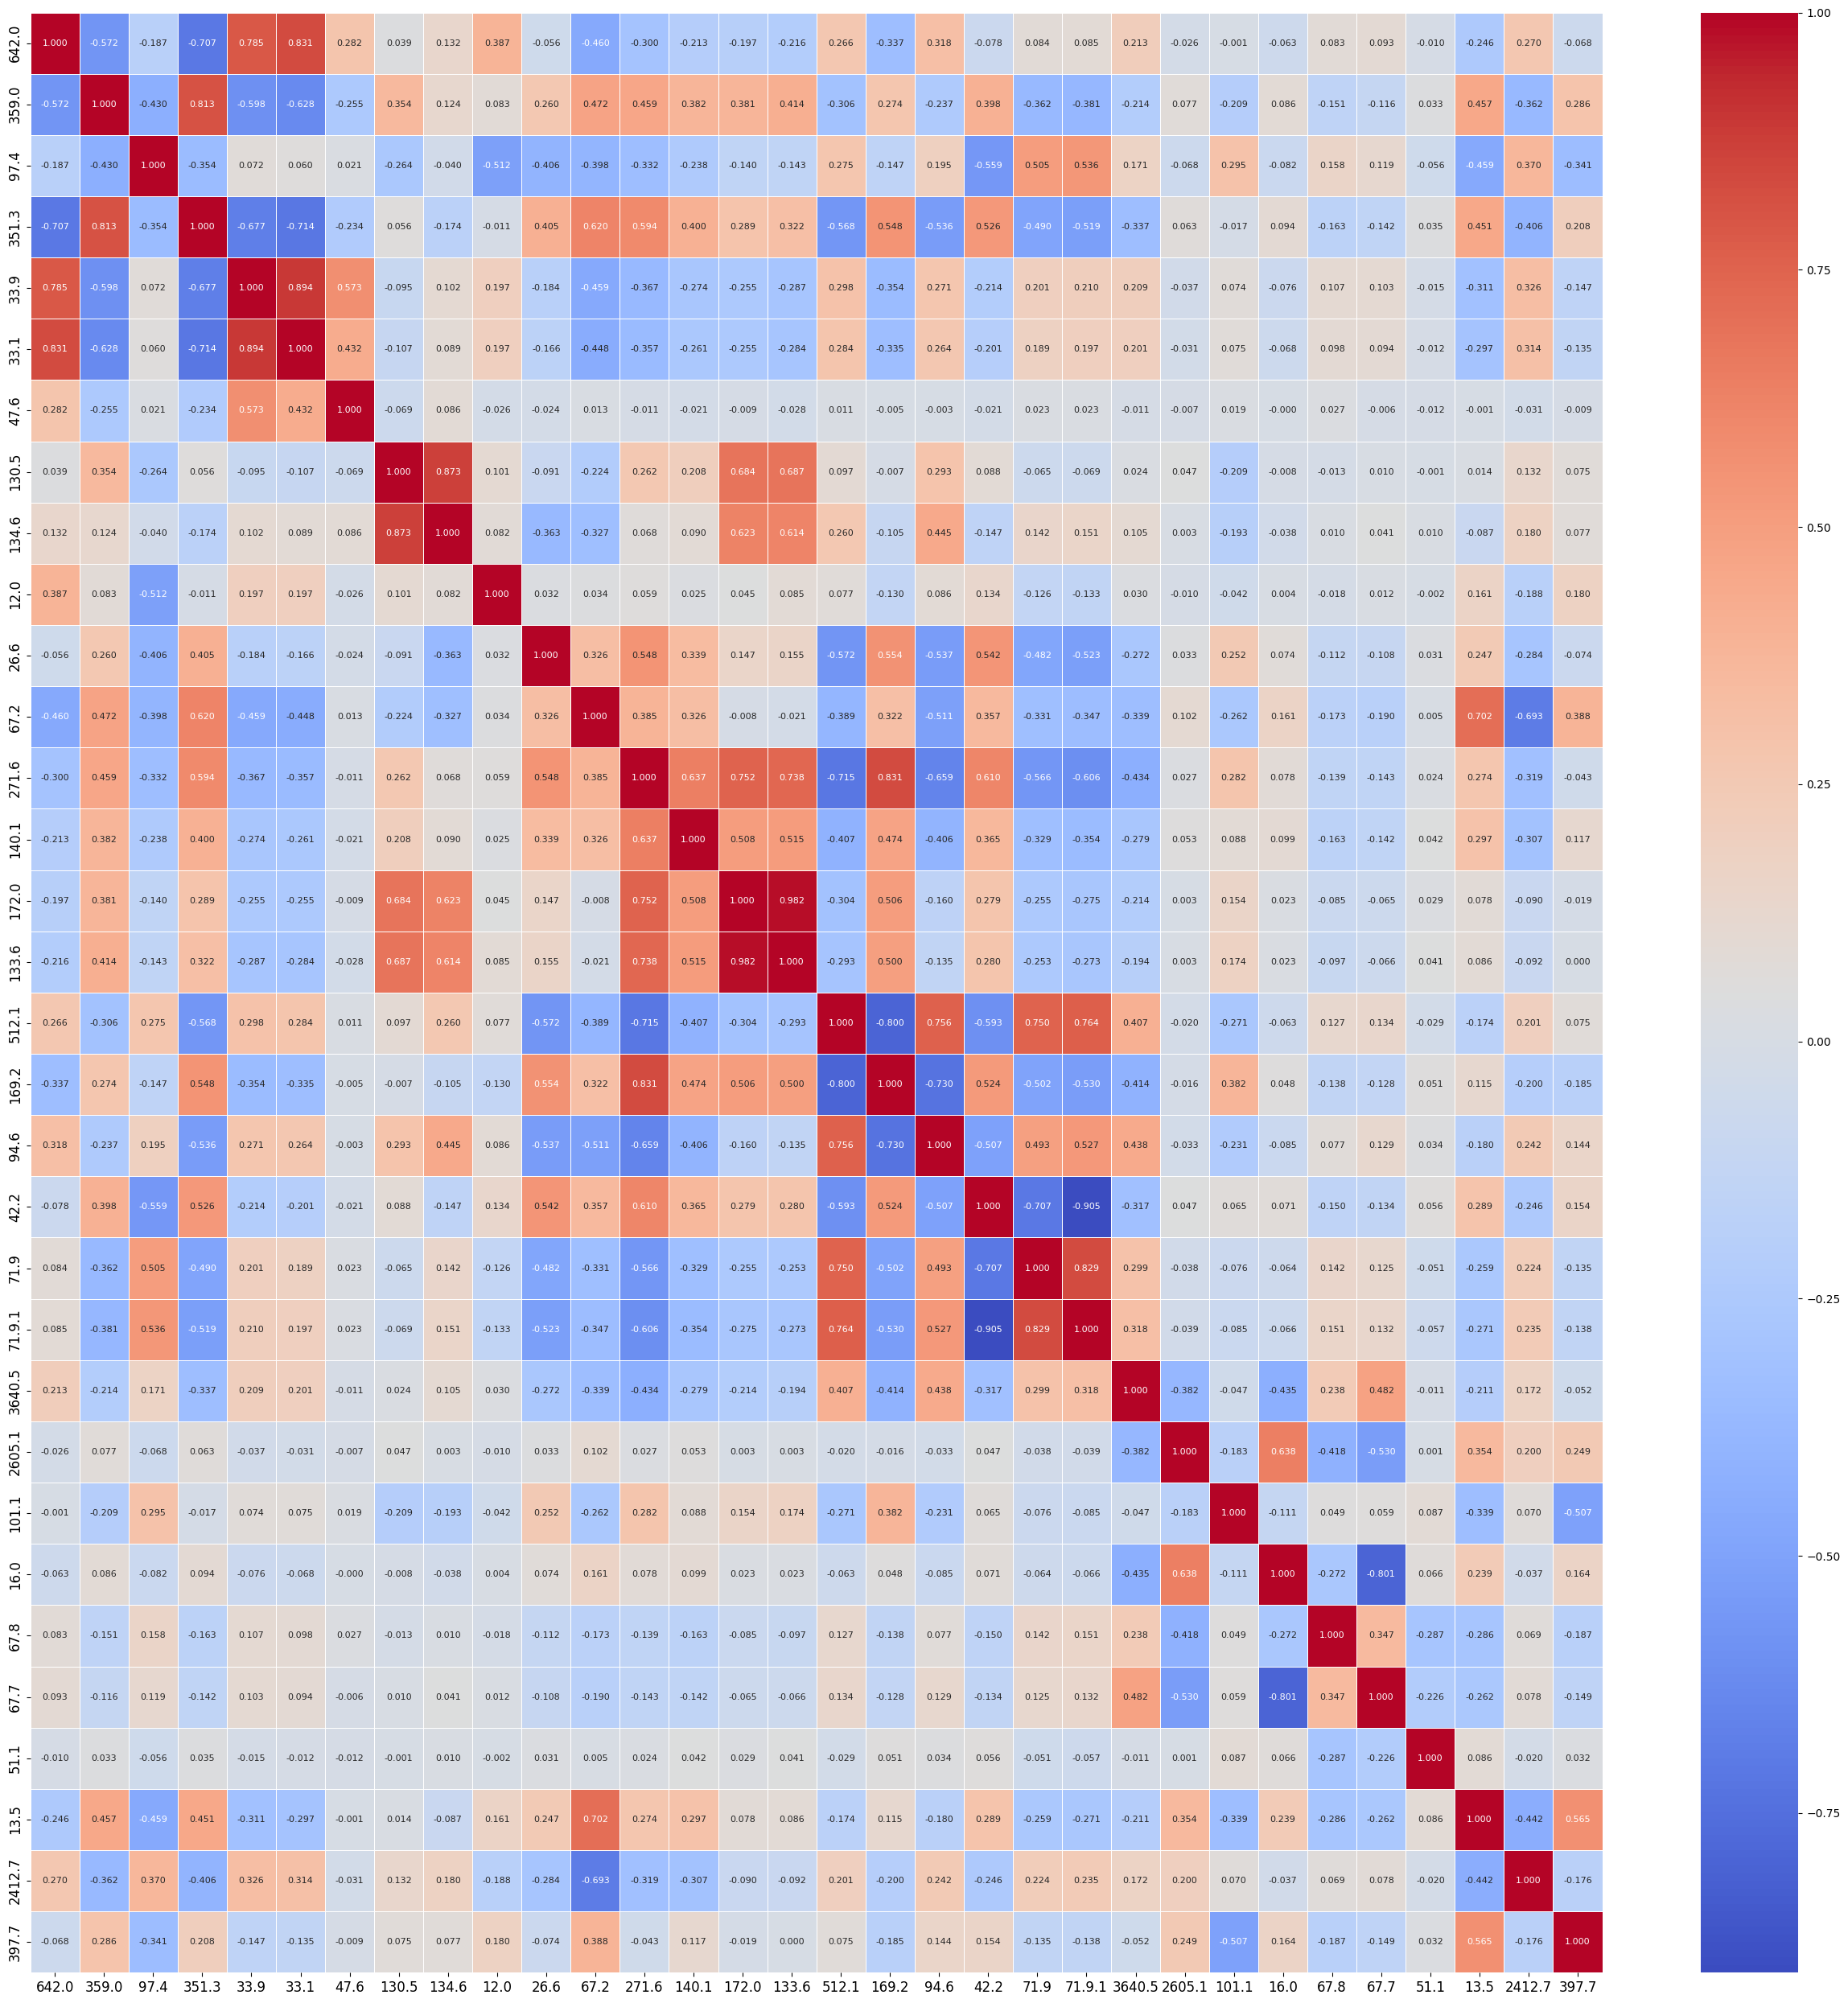

In [ ]:
corrM = damadic_df.corr()
plt.figure(figsize=(25,25))
sn.heatmap(corrM, annot=True ,cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, fmt='.3f', yticklabels=corrM.columns)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
col6= np.argsort(corrM['33.1'].values)
max_col6=col6[col6.shape[0]-2]
print("The featuer with most correlation with 33.1 is : {0} ".format(damadic_df.columns.values[max_col6]))

The featuer with most correlation with 33.1 is : 33.9 


**Part A-4**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(damadic_df)

damadic_df_normalized = pd.DataFrame(scaler.transform(damadic_df), columns= damadic_df.columns)
damadic_df_normalized

,642.0,359.0,97.4,351.3,33.9,33.1,47.6,130.5,134.6,12.0,...,3640.5,2605.1,101.1,16.0,67.8,67.7,51.1,13.5,2412.7,397.7
0,0.282101,-1.254694,0.928201,-1.027526,0.793824,0.364030,-0.191214,0.239526,0.532315,-2.230636,...,0.892042,-0.955754,1.494349,-0.242248,-0.960141,0.775803,-0.802983,-1.217698,-0.975208,-0.663768
1,0.376434,-1.308696,0.928201,-0.973898,0.461462,0.704927,0.114943,0.239526,0.532315,-2.230636,...,1.269371,-3.113717,1.494349,-0.268130,1.438087,0.463122,-0.112572,-1.122151,-0.866952,-0.663768
2,0.337400,-1.666462,0.928201,-0.926973,0.612536,0.487992,-0.344293,0.239526,0.532315,-2.230636,...,0.975654,-1.121424,1.494349,-1.070465,-0.622136,1.105854,0.347702,-1.217698,-0.866952,-0.663768
3,0.275595,-1.011683,0.928201,-0.913565,0.401033,0.487992,0.114943,0.239526,0.532315,-2.230636,...,0.619764,-0.875042,1.256659,-0.863411,1.196654,0.793174,1.038112,-1.122151,-0.866952,-0.663768
4,0.259330,-1.106188,0.928201,-0.900158,0.672966,0.240067,-0.038136,0.239526,0.532315,-2.230636,...,0.660499,-1.414533,1.256659,-1.251638,1.132273,0.810545,0.501126,-1.122151,-1.083463,-0.663768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86394,1.101828,0.554384,-2.202108,-0.001878,0.491677,0.364030,0.803798,0.417771,0.384326,1.659565,...,-1.224004,0.828389,-1.120239,0.301269,-0.766995,-0.579145,1.268249,2.030895,-1.191719,3.674868
86395,1.378324,-0.809175,-2.202108,-0.122543,0.431248,0.302049,0.574180,0.417771,0.384326,1.659565,...,-1.013900,1.325401,-0.882549,0.689496,-0.461181,-1.117651,-0.572846,2.030895,-1.289149,3.707006
86396,1.202668,-0.188148,-2.202108,-0.330354,0.612536,0.364030,0.956877,0.417771,0.384326,1.659565,...,-0.280681,0.705199,-0.882549,0.689496,-0.541658,-1.152393,0.347702,2.030895,-1.289149,3.707006
86397,1.401094,-0.842926,-2.202108,-0.430907,0.461462,0.364030,0.497640,0.417771,0.384326,1.659565,...,-0.113455,0.828389,-0.882549,0.870669,-1.169382,-0.770228,2.188797,2.126442,-1.289149,3.674868


# Part B

In [35]:
class ParzenClassifier:
    def __init__(self, bandwidth):
        self.bandwidth = bandwidth
    
    def fit(self, X, y, model):
        self.classes_ = np.unique(y)
        self.pdf_ = {}
        for c in self.classes_:
            Xc = X[y == c]
            self.pdf_[c] = self._fit_kde(Xc, model)
    
    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for c in self.classes_:
                likelihood = self.pdf_[c](x)
                prior = np.mean(y == c)
                posteriors.append(likelihood * prior)
            y_pred.append(self.classes_[np.argmax(posteriors)])
        return y_pred
    
    def _fit_kde(self, X , model):
        if model==1:
          kernel = lambda x: np.exp(-0.5 * np.sum((x - X) ** 2, axis=1) / self.bandwidth ** 2)
          
        elif model==2:
          kernel = lambda x: np.prod(0.5 * (np.abs((x - X) / self.bandwidth) <= 1), axis=1)

        elif model==3:
          def kernel(x):
            d = x - X
            return np.maximum(1 - np.sum(np.abs(d) / self.bandwidth, axis=1), 0)

        def kde(x):
            return np.sum(kernel(x), axis=0) / (X.shape[0] * self.bandwidth ** X.shape[1])
        return kde



Gaussian

In [36]:
classifier = ParzenClassifier(bandwidth=0.8)
X_train, X_test, y_train, y_test = train_test_split(damadic.values, y, test_size=0.1, random_state=1)
classifier.fit(X_train,y_train,1)
y_pred = classifier.predict(X_test)

Confusion matrix= 


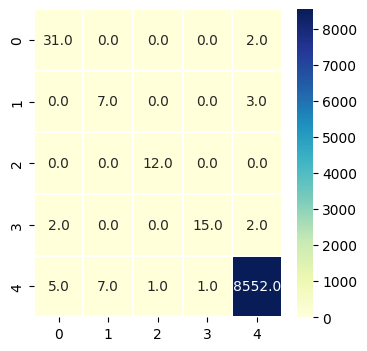

Acc= 0.997337962962963
MAR= 0.11455334896577507
FAR= 0.03530988837573547
Precision= [0.81578947 0.5        0.92307692 0.9375     0.99918215]
Recall= [0.93939394 0.7        1.         0.78947368 0.99836563]


In [37]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix= ")
plt.figure(figsize=(4,4))
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

Square

In [ ]:
classifier = ParzenClassifier(bandwidth=0.2)
classifier.fit(X_train,y_train,2)
y_pred = classifier.predict(X_test)


Confusion matrix= 


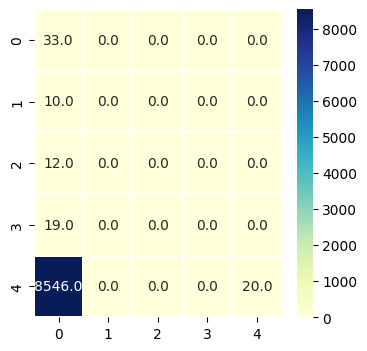

Acc= 0.0061342592592592594
MAR= 0.7995330375904739
FAR= 0.19976736070722345
Precision= [0.00382831        nan        nan        nan 1.        ]
Recall= [1.         0.         0.         0.         0.00233481]


<ipython-input-104-1968e06894c8>:13: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(conf) / np.sum(conf, axis=0)


In [ ]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix= ")
plt.figure(figsize=(4,4))
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

Tiangular

In [ ]:
classifier = ParzenClassifier(bandwidth=0.1)
classifier.fit(X_train,y_train,3)
y_pred = classifier.predict(X_test)


Confusion matrix= 


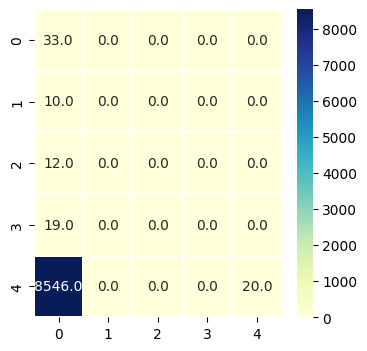

Acc= 0.0061342592592592594
MAR= 0.7995330375904739
FAR= 0.19976736070722345
Precision= [0.00382831        nan        nan        nan 1.        ]
Recall= [1.         0.         0.         0.         0.00233481]


<ipython-input-106-1968e06894c8>:13: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(conf) / np.sum(conf, axis=0)


In [ ]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix= ")
plt.figure(figsize=(4,4))
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.show()
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
accuracy = np.sum(TP) / np.sum(conf)
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
precision = np.diag(conf) / np.sum(conf, axis=0)
recall = np.diag(conf) / np.sum(conf, axis=1)
print('Acc= '+str(accuracy)+'\nMAR= '+str(MAR)+'\nFAR= '+str(FAR)+'\nPrecision= '+str(precision)+'\nRecall= '+str(recall))

Best BW with Gaussian kernel

In [64]:
acc=[]
MAR=[]
FAR=[]
bw= np.arange(0.55, 1.1, 0.01)
X_train, X_test, y_train, y_test = train_test_split(damadic.values, y, test_size=0.1, random_state=1)
for b in bw:
  classifier = ParzenClassifier(bandwidth=b)
  classifier.fit(X_train,y_train,1)
  y_pred = classifier.predict(X_test)
  conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  acc.append(accuracy_score(y_test, y_pred))
  TP = np.diag(conf)
  FP = np.sum(conf, axis=0) - TP
  FN = np.sum(conf, axis=1) - TP
  TN = np.sum(conf) - TP - FP - FN
  MAR.append(np.mean(FN / (FN + TP)))
  FAR.append(np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN)))
  print("I'm done @bw= {0}".format(b))


I'm done @bw= 0.55
I'm done @bw= 0.56
I'm done @bw= 0.5700000000000001
I'm done @bw= 0.5800000000000001
I'm done @bw= 0.5900000000000001
I'm done @bw= 0.6000000000000001
I'm done @bw= 0.6100000000000001
I'm done @bw= 0.6200000000000001
I'm done @bw= 0.6300000000000001
I'm done @bw= 0.6400000000000001
I'm done @bw= 0.6500000000000001
I'm done @bw= 0.6600000000000001
I'm done @bw= 0.6700000000000002
I'm done @bw= 0.6800000000000002
I'm done @bw= 0.6900000000000002
I'm done @bw= 0.7000000000000002
I'm done @bw= 0.7100000000000002
I'm done @bw= 0.7200000000000002
I'm done @bw= 0.7300000000000002
I'm done @bw= 0.7400000000000002
I'm done @bw= 0.7500000000000002
I'm done @bw= 0.7600000000000002
I'm done @bw= 0.7700000000000002
I'm done @bw= 0.7800000000000002
I'm done @bw= 0.7900000000000003
I'm done @bw= 0.8000000000000003
I'm done @bw= 0.8100000000000003
I'm done @bw= 0.8200000000000003
I'm done @bw= 0.8300000000000003
I'm done @bw= 0.8400000000000003
I'm done @bw= 0.8500000000000003
I'm d

The best BW is: 0.9000000000000004 with acc=0.9974537037037037 shown with red dot
The prefered acc based by ROC is:0.9974537037037037 shown with cayn dot


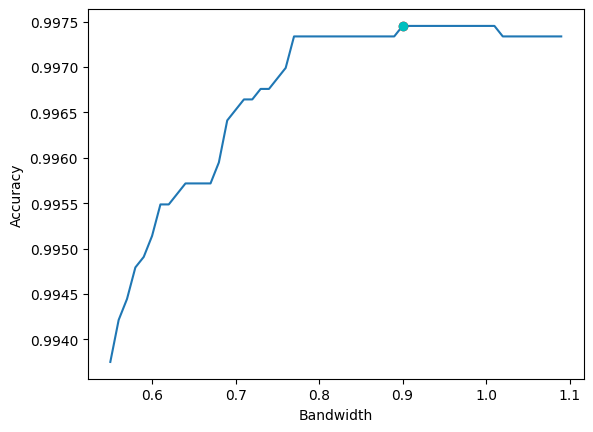

In [97]:
# Find the index of the minimum value in y
min_idx = np.argmin(MAR)

# Get the corresponding values of x and y
min_x = FAR[min_idx]
min_y = MAR[min_idx]

print("The best BW is: {0} with acc={1} shown with red dot\nThe prefered acc based by ROC is:{2} shown with cayn dot".format(bw[np.argmax(acc)],np.max(acc),acc[min_idx]))
fig, ax = plt.subplots()
ax.plot(bw, acc)
plt.plot(bw[np.argmax(acc)], np.max(acc), 'ro')
plt.plot(bw[min_idx],acc[min_idx],'co')
ax.set_xlabel('Bandwidth')
ax.set_ylabel('Accuracy')
plt.show()

Accuracy @local min=0.9974537037037037
BW @local min=0.9000000000000004


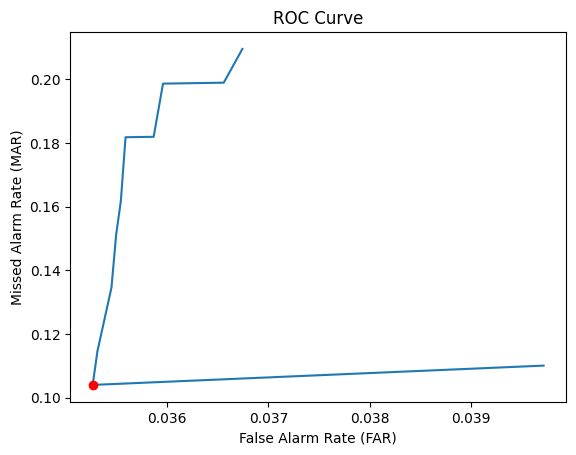

In [66]:
print("Accuracy @local min={0}".format(acc[min_idx]))
print("BW @local min={0}".format(bw[min_idx]))

fig, ax = plt.subplots()
plt.plot(FAR, MAR)
plt.plot(min_x, min_y, 'ro')
plt.xlabel('False Alarm Rate (FAR)')
plt.ylabel('Missed Alarm Rate (MAR)')
plt.title('ROC Curve')
# plt.legend()
plt.show()

**Using Prepared library for finding the best BW**

Gaussian

In [83]:
from sklearn.neighbors import KernelDensity as KDE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(damadic.values, y, test_size=0.1, random_state=1)

bw_1= np.arange(0.16, 0.28, 0.01)
acc_s_1=[]
MAR_1=[]
FAR_1=[]
for b in bw_1:
  kde_models = []
  for i in range(5):
      kde = KDE(kernel='gaussian', bandwidth=b)
      kde.fit(X_train[y_train == i+1])
      kde_models.append(kde)

  # Calculate the probability densities for each observation in the testing dataset
  prob_densities = []
  for i in range(len(X_test)):
      prob_densities_i = [kde.score_samples([X_test[i]])[0] for kde in kde_models]
      prob_densities.append(prob_densities_i)

  # Assign a class label to each observation based on the highest probability density
  y_pred = np.argmax(prob_densities, axis=1)+1
  conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  acc_s_1.append(accuracy_score(y_test, y_pred))
  TP = np.diag(conf)
  FP = np.sum(conf, axis=0) - TP
  FN = np.sum(conf, axis=1) - TP
  TN = np.sum(conf) - TP - FP - FN
  MAR_1.append(np.mean(FN / (FN + TP)))
  FAR_1.append(np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN)))
  print("I'm done @bw= {0}".format(b))

I'm done @bw= 0.16
I'm done @bw= 0.17
I'm done @bw= 0.18000000000000002
I'm done @bw= 0.19000000000000003
I'm done @bw= 0.20000000000000004
I'm done @bw= 0.21000000000000005
I'm done @bw= 0.22000000000000006
I'm done @bw= 0.23000000000000007
I'm done @bw= 0.24000000000000007
I'm done @bw= 0.2500000000000001
I'm done @bw= 0.2600000000000001
I'm done @bw= 0.27000000000000013
I'm done @bw= 0.28000000000000014


The best BW is: 0.24000000000000007 with acc=0.9969907407407408 shown with red dot
The prefered acc based by ROC is:0.9957175925925926 shown with cayn dot


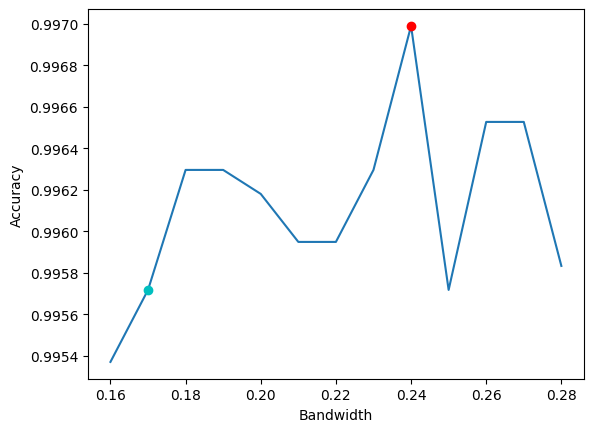

In [93]:
min_idx = np.argmin(MAR_1)

min_x = FAR_1[min_idx]
min_y = MAR_1[min_idx]

print("The best BW is: {0} with acc={1} shown with red dot\nThe prefered acc based by ROC is:{2} shown with cayn dot".format(bw_1[np.argmax(acc_s_1)],np.max(acc_s_1),acc_s_1[min_idx]))
fig, ax = plt.subplots()
ax.plot(bw_1, acc_s_1)
plt.plot(bw_1[np.argmax(acc_s_1)], np.max(acc_s_1), 'ro')
plt.plot(bw_1[min_idx],acc_s_1[min_idx],'co')
ax.set_xlabel('Bandwidth')
ax.set_ylabel('Accuracy')
plt.show()

Accuracy @local min=0.9957175925925926
BW @local min=0.17


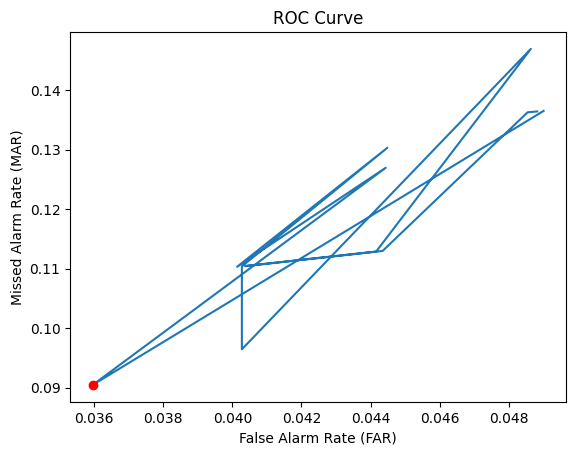

In [94]:
print("Accuracy @local min={0}".format(acc_s_1[min_idx]))
print("BW @local min={0}".format(bw_1[min_idx]))

fig, ax = plt.subplots()
plt.plot(FAR_1, MAR_1)
plt.plot(min_x, min_y, 'ro')
plt.xlabel('False Alarm Rate (FAR)')
plt.ylabel('Missed Alarm Rate (MAR)')
plt.title('ROC Curve')
# plt.legend()
plt.show()

Triangular

In [67]:
bw_2= np.arange(19, 20.5, 0.1)
acc_s_2=[]
MAR_2=[]
FAR_2=[]
for b in bw_2:
  kde_models = []
  for i in range(5):
      kde = KDE(kernel='tophat', bandwidth=b)
      kde.fit(X_train[y_train == i+1])
      kde_models.append(kde)

  # Calculate the probability densities for each observation in the testing dataset
  prob_densities = []
  for i in range(len(X_test)):
      prob_densities_i = [kde.score_samples([X_test[i]])[0] for kde in kde_models]
      prob_densities.append(prob_densities_i)

  # Assign a class label to each observation based on the highest probability density
  y_pred = np.argmax(prob_densities, axis=1)+1
  conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  acc_s_2.append(accuracy_score(y_test, y_pred))
  TP = np.diag(conf)
  FP = np.sum(conf, axis=0) - TP
  FN = np.sum(conf, axis=1) - TP
  TN = np.sum(conf) - TP - FP - FN
  MAR_2.append(np.mean(FN / (FN + TP)))
  FAR_2.append(np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN)))
  print("I'm done @bw= {0}".format(b))

I'm done @bw= 19.0
I'm done @bw= 19.1
I'm done @bw= 19.200000000000003
I'm done @bw= 19.300000000000004
I'm done @bw= 19.400000000000006
I'm done @bw= 19.500000000000007
I'm done @bw= 19.60000000000001
I'm done @bw= 19.70000000000001
I'm done @bw= 19.80000000000001
I'm done @bw= 19.900000000000013
I'm done @bw= 20.000000000000014
I'm done @bw= 20.100000000000016
I'm done @bw= 20.200000000000017
I'm done @bw= 20.30000000000002
I'm done @bw= 20.40000000000002


The best BW is: 19.200000000000003 with acc=0.9829861111111111 shown with red dot
The prefered acc based by ROC is:0.9828703703703704 shown with cayn dot


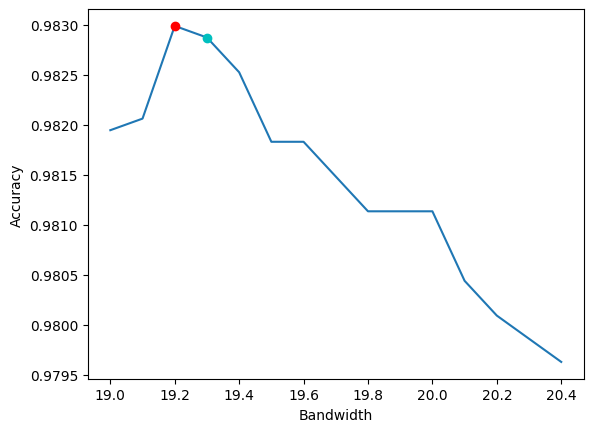

In [95]:
min_idx = np.argmin(MAR_2)

min_x = FAR_2[min_idx]
min_y = MAR_2[min_idx]

print("The best BW is: {0} with acc={1} shown with red dot\nThe prefered acc based by ROC is:{2} shown with cayn dot".format(bw_2[np.argmax(acc_s_2)],np.max(acc_s_2),acc_s_2[min_idx]))
fig, ax = plt.subplots()
ax.plot(bw_2, acc_s_2)
plt.plot(bw_2[np.argmax(acc_s_2)], np.max(acc_s_2), 'ro')
plt.plot(bw_2[min_idx],acc_s_2[min_idx],'co')
ax.set_xlabel('Bandwidth')
ax.set_ylabel('Accuracy')
plt.show()

Accuracy @local min=0.9828703703703704
BW @local min=19.300000000000004


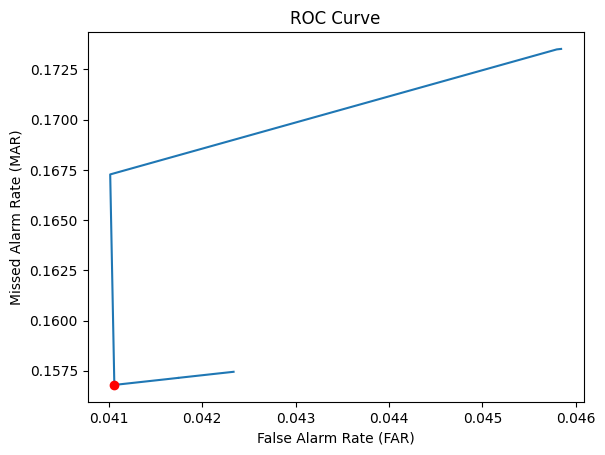

In [69]:
print("Accuracy @local min={0}".format(acc_s_2[min_idx]))
print("BW @local min={0}".format(bw_2[min_idx]))

fig, ax = plt.subplots()
plt.plot(FAR_2, MAR_2)
plt.plot(min_x, min_y, 'ro')
plt.xlabel('False Alarm Rate (FAR)')
plt.ylabel('Missed Alarm Rate (MAR)')
plt.title('ROC Curve')
# plt.legend()
plt.show()

Square

In [72]:
bw_3= np.arange(19.5, 22.5, 0.1)

acc_s_3=[]
MAR_3=[]
FAR_3=[]
for b in bw_3:
  kde_models = []
  for i in range(5):
      kde = KDE(kernel='tophat', bandwidth=b)
      kde.fit(X_train[y_train == i+1])
      kde_models.append(kde)

  # Calculate the probability densities for each observation in the testing dataset
  prob_densities = []
  for i in range(len(X_test)):
      prob_densities_i = [kde.score_samples([X_test[i]])[0] for kde in kde_models]
      prob_densities.append(prob_densities_i)

  # Assign a class label to each observation based on the highest probability density
  y_pred = np.argmax(prob_densities, axis=1)+1
  conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  acc_s_3.append(accuracy_score(y_test, y_pred))
  TP = np.diag(conf)
  FP = np.sum(conf, axis=0) - TP
  FN = np.sum(conf, axis=1) - TP
  TN = np.sum(conf) - TP - FP - FN
  MAR_3.append(np.mean(FN / (FN + TP)))
  FAR_3.append(np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN)))
  print("I'm done @bw= {0}".format(b))

I'm done @bw= 19.5
I'm done @bw= 19.6
I'm done @bw= 19.700000000000003
I'm done @bw= 19.800000000000004
I'm done @bw= 19.900000000000006
I'm done @bw= 20.000000000000007
I'm done @bw= 20.10000000000001
I'm done @bw= 20.20000000000001
I'm done @bw= 20.30000000000001
I'm done @bw= 20.400000000000013
I'm done @bw= 20.500000000000014
I'm done @bw= 20.600000000000016
I'm done @bw= 20.700000000000017
I'm done @bw= 20.80000000000002
I'm done @bw= 20.90000000000002
I'm done @bw= 21.00000000000002
I'm done @bw= 21.100000000000023
I'm done @bw= 21.200000000000024
I'm done @bw= 21.300000000000026
I'm done @bw= 21.400000000000027
I'm done @bw= 21.50000000000003
I'm done @bw= 21.60000000000003
I'm done @bw= 21.70000000000003
I'm done @bw= 21.800000000000033
I'm done @bw= 21.900000000000034
I'm done @bw= 22.000000000000036
I'm done @bw= 22.100000000000037
I'm done @bw= 22.20000000000004
I'm done @bw= 22.30000000000004
I'm done @bw= 22.40000000000004


The best BW is: 19.5 with acc=0.9818287037037037 shown with red dot
The prefered acc based by ROC is:0.9777777777777777 shown with cayn dot


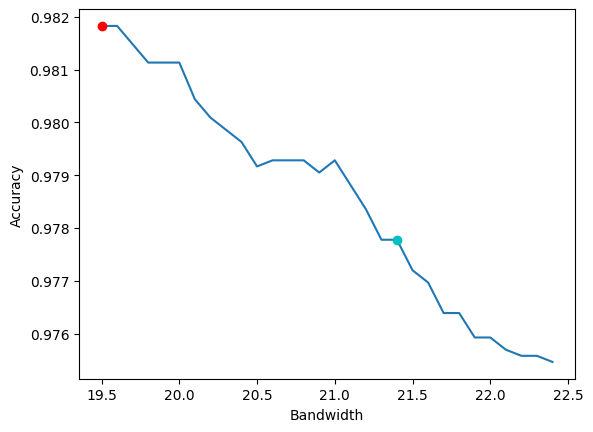

In [96]:
min_idx = np.argmin(MAR_3)

min_x = FAR_3[min_idx]
min_y = MAR_3[min_idx]

print("The best BW is: {0} with acc={1} shown with red dot\nThe prefered acc based by ROC is:{2} shown with cayn dot".format(bw_3[np.argmax(acc_s_3)],np.max(acc_s_3),acc_s_3[min_idx]))
fig, ax = plt.subplots()
ax.plot(bw_3, acc_s_3)
plt.plot(bw_3[np.argmax(acc_s_3)], np.max(acc_s_3), 'ro')
plt.plot(bw_3[min_idx],acc_s_3[min_idx],'co')
ax.set_xlabel('Bandwidth')
ax.set_ylabel('Accuracy')
plt.show()

Accuracy @local min=0.9777777777777777
BW @local min=21.400000000000027


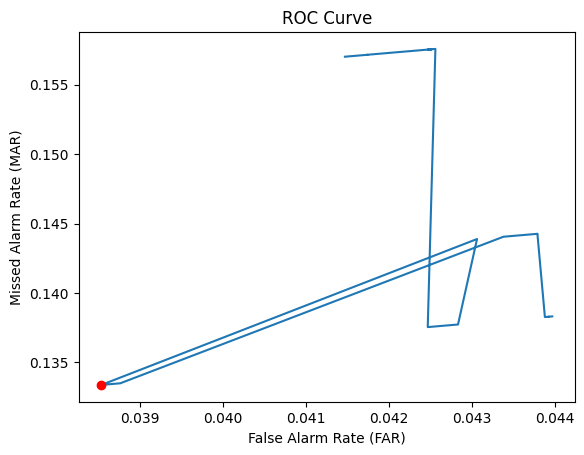

In [73]:
# f# Find the index of the minimum value in y
min_idx = np.argmin(MAR_3)

# Get the corresponding values of x and y
min_x = FAR_3[min_idx]
min_y = MAR_3[min_idx]

print("Accuracy @local min={0}".format(acc_s_3[min_idx]))
print("BW @local min={0}".format(bw_3[min_idx]))

fig, ax = plt.subplots()
plt.plot(FAR_3, MAR_3)
plt.plot(min_x, min_y, 'ro') 
plt.xlabel('False Alarm Rate (FAR)')
plt.ylabel('Missed Alarm Rate (MAR)')
plt.title('ROC Curve')
# plt.legend()
plt.show()

# Part C

In [5]:
from collections import Counter
import numpy as np
from scipy.spatial import cKDTree

class KNNClassifier:
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.tree = cKDTree(X)
    
    def predict(self, X):
        _, indices = self.tree.query(X, k=self.k)
        k_labels = self.y_train[indices]
        y_pred = np.array([Counter(labels).most_common()[0][0] for labels in k_labels])
        return y_pred


In [169]:
# Create an instance of the KNNClassifier class with k=3
knn = KNNClassifier(k=3)

X_train, X_test, y_train, y_test = train_test_split(damadic.values, y, test_size=0.1, random_state=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
conf_k3 = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy_k3 = np.sum(np.diag(conf_k3)) / np.sum(conf_k3)
TP = np.diag(conf_k3)
FP = np.sum(conf_k3, axis=0) - TP
FN = np.sum(conf_k3, axis=1) - TP
TN = np.sum(conf_k3) - TP - FP - FN
MAR_k3 = np.mean(FN / (FN + TP))
FAR_k3 = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
print("The Conf. Matrix:\n{0}\nAcc= {1}\t FAR= {2}\t MAR= {3}".format(conf_k3,accuracy_k3,FAR_k3,MAR_k3))

The Conf. Matrix:
[[  26    0    2    0    5]
 [   0    5    0    1    4]
 [   0    0   12    0    0]
 [   0    0    0   14    5]
 [   2    0    0    3 8561]]
Acc= 0.9974537037037037	 FAR= 0.06400749677453199	 MAR= 0.19517256197399235


In [7]:
K=np.arange(2, 20, 1)
accuracies=[]
MARs=[]
FARs=[]
X_train, X_test, y_train, y_test = train_test_split(damadic.values, y, test_size=0.1, random_state=1)
for i,ki in enumerate(K):
  MAR=0
  FAR=0
  knn = KNNClassifier(k=ki)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  conf_k = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

  TP = np.diag(conf_k)
  FN = np.sum(conf_k, axis=1) - TP
  FP = np.sum(conf_k, axis=0) - TP
  TN = np.sum(conf_k) - TP - FP - FN
  MAR = np.mean(FN / (FN + TP))
  FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
  MARs.append(MAR)
  FARs.append(FAR)
  print("I'm done @k={0}.\nThe conf=\n{1}\nFAR= {2}\tMAR= {3}".format(ki,conf_k,FAR,MAR))




I'm done @k=2.
The conf=
[[  30    0    0    0    3]
 [   0    7    0    0    3]
 [   0    0   12    0    0]
 [   0    1    0   16    2]
 [   2    8    1    3 8552]]
FAR= 0.03971953303032223	MAR= 0.11008763923690745
I'm done @k=3.
The conf=
[[  29    0    0    0    4]
 [   0    6    0    0    4]
 [   0    0   12    0    0]
 [   0    0    0   16    3]
 [   2    1    1    1 8561]]
FAR= 0.05199672472366103	MAR= 0.13593811221322682
I'm done @k=4.
The conf=
[[  29    0    0    0    4]
 [   0    6    0    0    4]
 [   0    0   12    0    0]
 [   0    0    0   17    2]
 [   2    3    0    3 8558]]
FAR= 0.047990121700281656	MAR= 0.12548184078518204
I'm done @k=5.
The conf=
[[  28    0    1    0    4]
 [   0    6    0    0    4]
 [   0    0   12    0    0]
 [   0    0    0   15    4]
 [   2    0    0    3 8561]]
FAR= 0.05609238137723429	MAR= 0.15252503406330656
I'm done @k=6.
The conf=
[[  28    0    1    0    4]
 [   0    6    0    0    4]
 [   0    0   12    0    0]
 [   0    0    0   15    4

The Maximum accuracy is for k=3 with acc=0.9981481481481481


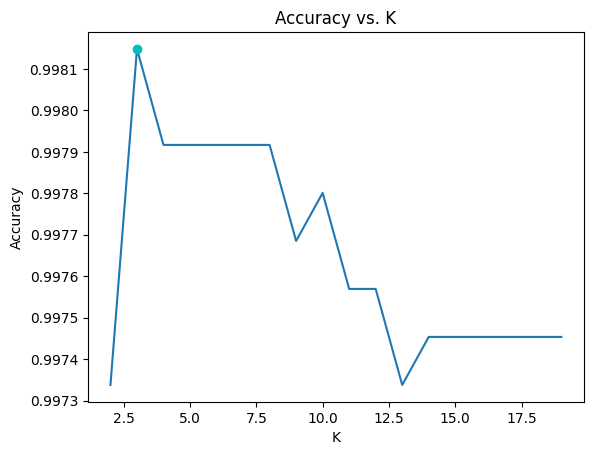

In [10]:
print("The Maximum accuracy is for k={0} with acc={1}".format(K[np.argmax(accuracies)],np.max(accuracies)))
fig, ax = plt.subplots()
plt.plot(K, accuracies)
plt.plot(K[np.argmax(accuracies)],np.max(accuracies),'co')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
# plt.legend()
plt.show()

The best K with respect ROC is k=2 with acc=0.997337962962963


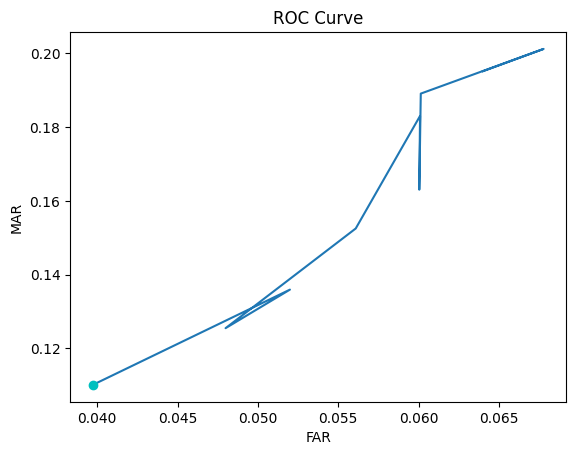

In [11]:
print("The best K with respect ROC is k={0} with acc={1}".format(K[np.argmin(MARs)],accuracies[np.argmin(MARs)]))
fig, ax = plt.subplots()
plt.plot(FARs, MARs)
plt.plot(FARs[np.argmin(MARs)],np.min(MARs),'co')
plt.xlabel('FAR')
plt.ylabel('MAR')
plt.title('ROC Curve')
# plt.legend()
plt.show()

# Part D

In [99]:
X_train, X_test, y_train, y_test = train_test_split(np.concatenate([f16,f17]), y[np.concatenate([class1f16_idx, class2f17_idx])], test_size=0.1, random_state=1)


Perceptron

In [152]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

perceptron = Perceptron( alpha=0.1)

# fit the classifier to the training data
perceptron.fit(X_train, y_train)

# make predictions on the test data
y_pred = perceptron.predict(X_test)


Confusion matrix= 


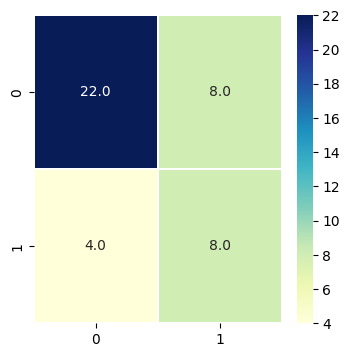

Acc= 0.7142857142857143	 FAR= 0.4605263157894737	 MAR= 0.3


In [153]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))

print("Confusion matrix= ")
plt.figure(figsize=(4,4))
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.show()
print("Acc= {0}\t FAR= {1}\t MAR= {2}".format(accuracy,FAR,MAR))

LS

In [156]:
bias=1
# add a column of ones to the training data for the bias term
X_train_1 = np.hstack((np.full((X_train.shape[0], 1), bias), X_train))
w = np.linalg.inv(X_train_1.T @ X_train_1) @ X_train_1.T @ y_train

# add a column of ones to the test data for the bias term
X_test_1 = np.hstack((np.full((X_test.shape[0], 1), bias), X_test))

y_pred = np.round(X_test_1 @ w)


Confusion matrix= 


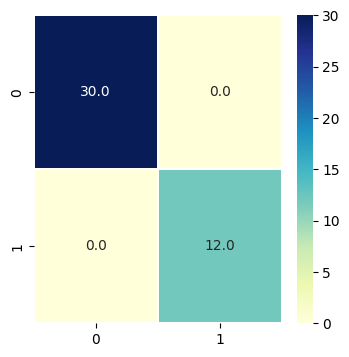

Acc= 1.0	 FAR= 0.0	 MAR= 0.0


In [157]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))

print("Confusion matrix= ")
plt.figure(figsize=(4,4))
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.show()
print("Acc= {0}\t FAR= {1}\t MAR= {2}".format(accuracy,FAR,MAR))

Changing the bias in LS

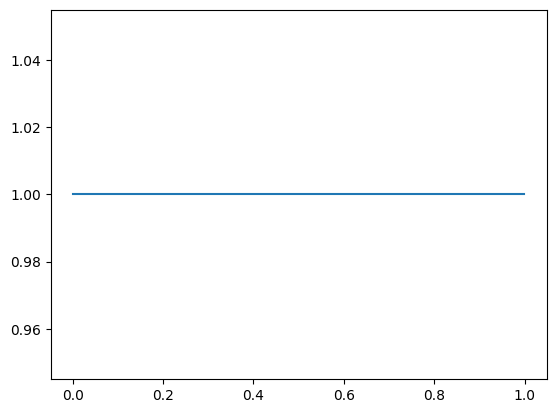

In [147]:
b=np.arange(0.001,1,0.001)
accs=[]
for bi in b:
  X_train_1 = np.hstack((np.full((X_train.shape[0], 1), bi), X_train))
  w = np.linalg.inv(X_train_1.T @ X_train_1) @ X_train_1.T @ y_train
  X_test_1 = np.hstack((np.full((X_test.shape[0], 1), bi), X_test))

  y_pred = np.round(X_test_1 @ w)
  accs.append(accuracy_score(y_test, y_pred))
plt.plot(b, accs)

Sequential Widrowf-Hoff

In [136]:
import numpy as np

class SWHClassifier:
    def __init__(self, input_size, learning_rate):
        self.weights = np.zeros(input_size) # initialize weights to zero
        self.bias = 0 # initialize bias to zero
        self.learning_rate = learning_rate

    def predict(self, X):
        y_pred = np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)+1
        return y_pred

    def fit(self, X, y, epochs=1, bias=0):
        self.bias = bias # set bias value
        X = np.asarray(X)
        y = np.asarray(y)
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                x_i = X[i]
                y_i = y[i]
                y_pred = np.where(np.dot(x_i, self.weights) + self.bias >= 0, 1, 0)
                error = y_i - y_pred
                self.weights += self.learning_rate * error * x_i
                # self.bias += self.learning_rate * error
        # print("Done!")


In [104]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()
Y_encoder = le.fit_transform(y[np.concatenate([class1f16_idx, class2f17_idx])])
X_train_swh, X_test_swh, y_train_swh, y_test_swh=train_test_split(np.concatenate([f16,f17]),Y_encoder, test_size=0.1, random_state=1)

In [158]:
learning_rate = 0.0001
epochs = 200
swh = SWHClassifier(X_train_swh.shape[1],learning_rate=learning_rate)

swh.fit(X_train_swh, y_train_swh, epochs)

y_pred=swh.predict(X_test_swh)


Confusion matrix= 


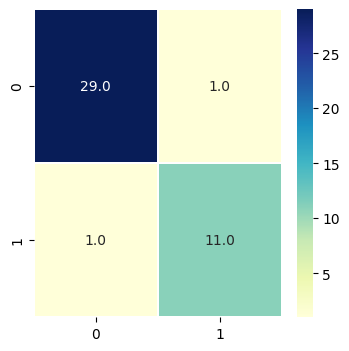

Acc= 0.9523809523809523	 FAR= 0.10918114143920596	 MAR= 0.058333333333333334


In [159]:
conf = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))

print("Confusion matrix= ")
plt.figure(figsize=(4,4))
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.show()
print("Acc= {0}\t FAR= {1}\t MAR= {2}".format(accuracy,FAR,MAR))

Changing Learning Rate in Sequential Widrowf-Hoff

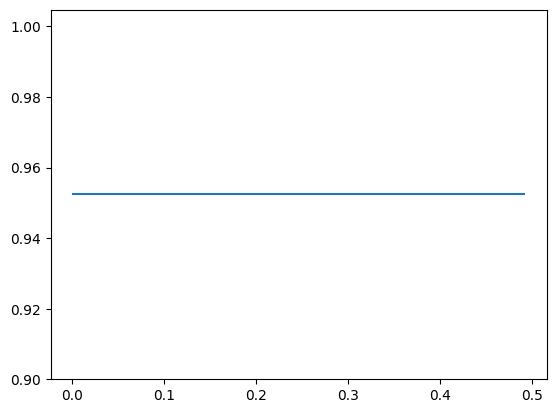

In [139]:
lr=np.arange(0.001,0.5,0.01)
accs=[]
for lri in lr:
  swh = SWHClassifier(X_train_swh.shape[1],learning_rate=learning_rate)
  swh.fit(X_train_swh, y_train_swh, epochs)
  y_pred=swh.predict(X_test_swh)
  accs.append(accuracy_score(y_test, y_pred))
plt.plot(lr, accs)

Changing Bias in Sequential Widrowf-Hoff

Bias vs acc


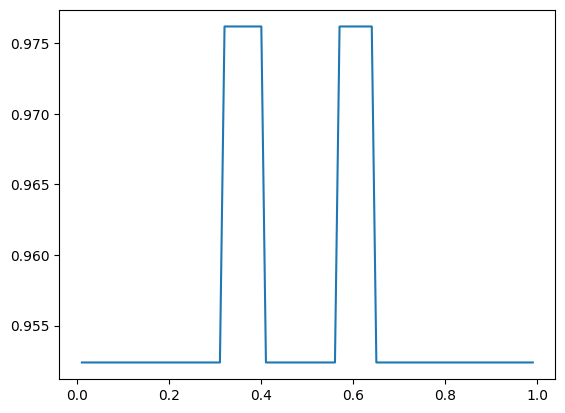

In [151]:
b=np.arange(0.01,1,0.01)
accs=[]
for bi in b:
  swh = SWHClassifier(X_train_swh.shape[1],learning_rate=0.0001)
  swh.fit(X_train_swh, y_train_swh,epochs=epochs, bias=bi)
  y_pred=swh.predict(X_test_swh)
  accs.append(accuracy_score(y_test, y_pred))

print("Bias vs acc")
plt.plot(b, accs)

# Part E

Normalized

In [9]:
# Create an instance of the KNNClassifier class with k=3
knn = KNNClassifier(k=3)

X_train, X_test, y_train, y_test = train_test_split(damadic_df_normalized.values, y, test_size=0.1, random_state=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

Confusion matrix= 


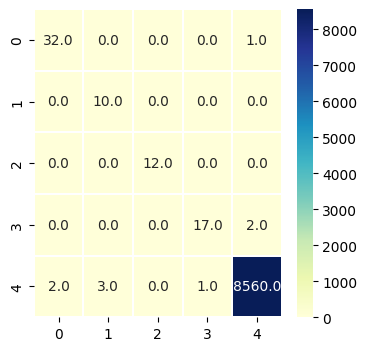

Acc= 0.9989583333333333	 FAR= 0.015862736046203488	 MAR= 0.02725332636241124


In [10]:
conf_k3_nor = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy_k3_nor = np.sum(np.diag(conf_k3_nor)) / np.sum(conf_k3_nor)
TP = np.diag(conf_k3_nor)
FP = np.sum(conf_k3_nor, axis=0) - TP
FN = np.sum(conf_k3_nor, axis=1) - TP
TN = np.sum(conf_k3_nor) - TP - FP - FN
MAR_k3_nor = np.mean(FN / (FN + TP))
FAR_k3_nor = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))

print("Confusion matrix= ")
plt.figure(figsize=(4,4))
sn.heatmap(conf_k3_nor, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.show()
print("Acc= {0}\t FAR= {1}\t MAR= {2}".format(accuracy_k3_nor,FAR_k3_nor,MAR_k3_nor))

Not normalized

In [11]:
X_train, X_test, y_train, y_test = train_test_split(damadic.values, y, test_size=0.1, random_state=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

Confusion matrix= 


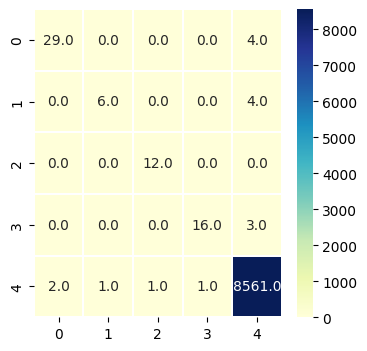

Acc= 0.9981481481481481	 FAR= 0.05199672472366103	 MAR= 0.13593811221322682


In [12]:
conf_k3 = confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy_k3 = np.sum(np.diag(conf_k3)) / np.sum(conf_k3)
# acc_s_k3[i]=accuracy
TP = np.diag(conf_k3)
FP = np.sum(conf_k3, axis=0) - TP
FN = np.sum(conf_k3, axis=1) - TP
TN = np.sum(conf_k3) - TP - FP - FN
MAR_k3 = np.mean(FN / (FN + TP))
FAR_k3 = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))
print("Confusion matrix= ")
plt.figure(figsize=(4,4))
sn.heatmap(conf_k3, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.show()
print("Acc= {0}\t FAR= {1}\t MAR= {2}".format(accuracy_k3,FAR_k3,MAR_k3))

# Part F

In [178]:
!gdown 1lZ4My-6uNvcuB3iDPYv27e349b1cO3Xw

Downloading...
From: https://drive.google.com/uc?id=1lZ4My-6uNvcuB3iDPYv27e349b1cO3Xw
To: /content/09112001.csv
100% 15.5M/15.5M [00:00<00:00, 131MB/s]


In [182]:
damadic_09 = pd.read_csv('/content/09112001.csv')
f16_idx = np.concatenate([np.arange(57275, 57550), np.arange(60650, 60700), np.arange(60870, 60960)])
f18_idx = np.concatenate([np.arange(58830, 58930), np.arange(58520, 58625)])
y_09 = np.zeros(damadic_09.shape[0])
y_09[f16_idx] = 1
y_09[f18_idx] = 2

In [183]:
f16_09=damadic.values[f16_idx]
f18_09=damadic.values[f18_idx]
Y_encoder_09 = le.fit_transform(y[np.concatenate([f16_idx, f18_idx])])
X_09=np.concatenate([f16_09,f18_09])

In [176]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()
Y_encoder = le.fit_transform(y[np.concatenate([class1f16_idx, class3f18_idx])])
X=np.concatenate([f16,f18])

In [198]:
learning_rate = 0.0001
epochs = 100
swh = SWHClassifier(X.shape[1],learning_rate=learning_rate)

swh.fit(X, Y_encoder, epochs,bias=0.6)

y_pred=swh.predict(X_09)-1


Confusion matrix= 


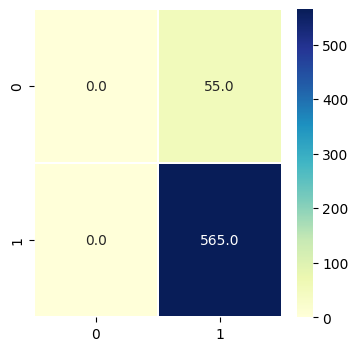

Acc= 0.9112903225806451	 FAR= 0.5	 MAR= 0.5


In [199]:
conf = confusion_matrix = metrics.confusion_matrix(Y_encoder_09, y_pred)
accuracy = accuracy_score(Y_encoder_09, y_pred)
TP = np.diag(conf)
FP = np.sum(conf, axis=0) - TP
FN = np.sum(conf, axis=1) - TP
TN = np.sum(conf) - TP - FP - FN
MAR = np.mean(FN / (FN + TP))
FAR = np.mean((FP + np.transpose(FP)) / (FP + np.transpose(FP) + TN))

print("Confusion matrix= ")
plt.figure(figsize=(4,4))
sn.heatmap(conf, annot=True,cmap="YlGnBu", linewidths=0.2, annot_kws={"size": 10}, fmt='.1f')
plt.show()
print("Acc= {0}\t FAR= {1}\t MAR= {2}".format(accuracy,FAR,MAR))